<a href="https://colab.research.google.com/github/KumarSP09/Java/blob/master/AutoTicket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import string
import re

import nltk
from nltk.corpus import wordnet,stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud, STOPWORDS
import matplotlib.cm as cm

import unicodedata

In [173]:
df = pd.read_excel('/content/sample_data/input_data.xlsx')
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [174]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_70       1
GRP_73       1
GRP_67       1
GRP_35       1
Name: Assignment group, Length: 74, dtype: int64

In [175]:
df.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [181]:
df['Short_Long_Desc']=df['Short description']+' '+df['Description']

In [182]:
df.fillna( value=' ', inplace=True)

In [183]:
callers = df['Caller'].unique()

In [187]:
from dateutil import parser
from collections import OrderedDict

def is_valid_date(date_str):
    try:
        parser.parse(date_str)
        return True
    except:
        return False

def clean_data(text):
    text=text.lower()
    text = ' '.join([w for w in text.split() if not is_valid_date(w)])
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove numbers 
    text = re.sub(r'\d+','' ,text)
    # Remove Non Dictionary character-TODO
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    text = re.sub(r'_',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    for name in callers:
      namelist = [part for part in name.split()]
      for namepart in namelist: 
          text = text.replace(namepart,'')
          
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    text = re.sub(' +', ' ', text)
    text = text.strip()
    return text
  
df['Short_Long_Desc'] = df['Short_Long_Desc'].apply(clean_data)

#df['Short_Long_Desc'] = df.drop_duplicates(['Short_Long_Desc'],inplace=True)
df['Short_Long_Desc'] = (df['Short_Long_Desc'].str.split()
                              .apply(lambda x: OrderedDict.fromkeys(x).keys())
                              .str.join(' '))

In [188]:
df.head(10)

,Short description,Description,Caller,Assignment group,Short_Long_Desc
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook hello team my meetings skype etc are n...
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi cannot on best
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in engineering tool and skype
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event critical hostname company com the value ...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employee e...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant


In [189]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [190]:
from nltk.tokenize import word_tokenize
df['tokenized_text'] = df.apply(lambda row1: nltk.word_tokenize(row1['Short_Long_Desc']), axis=1)

In [191]:
nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(tokenized_text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(tokenized_text)]



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [192]:
df['text_lemmatized'] = df.Short_Long_Desc.apply(lemmatize_text)

In [193]:
df.head()

,Short description,Description,Caller,Assignment group,Short_Long_Desc,tokenized_text,text_lemmatized
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...,"[login, issue, verified, user, details, employ...","[login, issue, verified, user, detail, employe..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook hello team my meetings skype etc are n...,"[outlook, hello, team, my, meetings, skype, et...","[outlook, hello, team, my, meeting, skype, etc..."
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi cannot on best,"[cant, log, in, to, vpn, hi, can, not, on, best]","[cant, log, in, to, vpn, hi, cannot, on, best]"
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,"[skype, error]","[skype, error]"


In [194]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
df['Lemmatized_Desc_clean']= df['text_lemmatized'].apply(lambda x: [item for item in x if item not in stop])

In [196]:
df.head(10)

,Short description,Description,Caller,Assignment group,Short_Long_Desc,tokenized_text,text_lemmatized,Lemmatized_Desc_clean
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue verified user details employee and...,"[login, issue, verified, user, details, employ...","[login, issue, verified, user, detail, employe...","[login, issue, verified, user, detail, employe..."
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,outlook hello team my meetings skype etc are n...,"[outlook, hello, team, my, meetings, skype, et...","[outlook, hello, team, my, meeting, skype, etc...","[outlook, hello, team, meeting, skype, etc, ap..."
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn hi cannot on best,"[cant, log, in, to, vpn, hi, can, not, on, best]","[cant, log, in, to, vpn, hi, cannot, on, best]","[cant, log, vpn, hi, cannot, best]"
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr tool page,"[unable, to, access, hr, tool, page]","[unable, to, access, hr, tool, page]","[unable, access, hr, tool, page]"
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,"[skype, error]","[skype, error]","[skype, error]"
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in engineering tool and skype,"[unable, to, log, in, engineering, tool, and, ...","[unable, to, log, in, engineering, tool, and, ...","[unable, log, engineering, tool, skype]"
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,event critical hostname company com the value ...,"[event, critical, hostname, company, com, the,...","[event, critical, hostname, company, com, the,...","[event, critical, hostname, company, com, valu..."
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket no employment status new non employee e...,"[ticket, no, employment, status, new, non, emp...","[ticket, no, employment, status, new, non, emp...","[ticket, employment, status, new, non, employe..."
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook,"[unable, to, disable, add, ins, on, outlook]","[unable, to, disable, add, in, on, outlook]","[unable, disable, add, outlook]"
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant,"[ticket, update, on, inplant]","[ticket, update, on, inplant]","[ticket, update, inplant]"


In [197]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gensim
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import spacy


# Plotting tools
#import pyLDAvis
#import pyLDAvis.gensim  # don't skip this 
#warnings.filterwarnings("ignore",category=DeprecationWarning)

In [198]:
#to process the simple_process gensim package as input needed as string 
combined_text=df.Lemmatized_Desc_clean.values.tolist()

In [ ]:
combined_text

In [199]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(combined_text))

In [200]:
print(data_words[1])

['outlook', 'hello', 'team', 'meeting', 'skype', 'etc', 'appearing', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [201]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [202]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [203]:
data_words_bigrams = make_bigrams(data_words)

In [204]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [208]:
wordclouds =''

In [209]:
wordclouds=' '.join(map(str, data_words)) 

"['login', 'issue', 'verified', 'user', 'details_employee', 'manager', 'name', 'checked', 'user', 'name', 'ad', 'reset', 'password', 'advised', 'user', 'login', 'check', 'caller_confirmed', 'wa', 'able', 'login', 'issue', 'resolved'] ['outlook', 'received', 'from', 'hmjdrvpb', 'komuaywn', 'gmail', 'com', 'hello', 'team', 'meetings', 'skype', 'meeting', 'etc', 'appearing', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'this', 'kind'] ['cant', 'log', 'vpn', 'received', 'from', 'eylqgodm', 'ybqkwiam', 'gmail', 'com', 'hi', 'cannot', 'log', 'vpn', 'best'] ['unable', 'access', 'hr_tool', 'page', 'unable', 'access', 'hr_tool', 'page'] ['skype', 'error', 'skype', 'error'] ['unable', 'log', 'engineering_tool', 'skype', 'unable', 'log', 'engineering_tool', 'skype'] ['ticket_no', 'employment_status', 'new', 'non', 'employee', 'enter', 'user', 'name', 'ticket_no', 'employment_status', 'new', 'non', 'employee', 'enter', 'user', 'name'] ['unable', 'disable', 'add', 'outlook', 'u

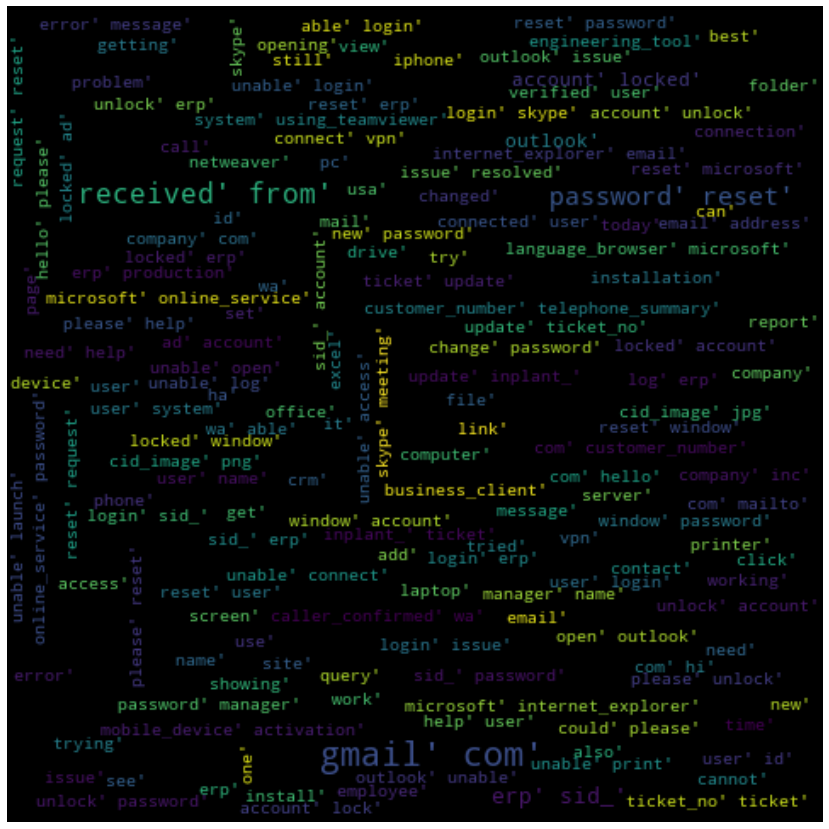

In [126]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(30,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

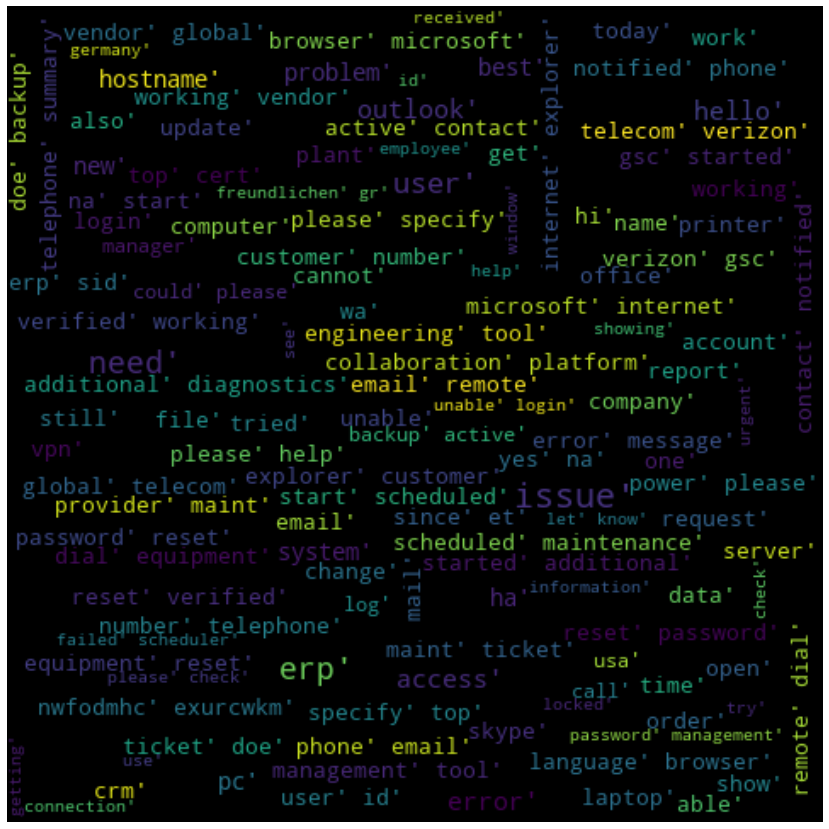

In [210]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordclouds)
plt.figure(figsize=(30,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [211]:
data_words

[['login',
  'issue',
  'verified',
  'user',
  'detail',
  'employee',
  'manager',
  'name',
  'checked',
  'ad',
  'reset',
  'password',
  'advised',
  'check',
  'caller',
  'confirmed',
  'wa',
  'able',
  'resolved'],
 ['outlook',
  'hello',
  'team',
  'meeting',
  'skype',
  'etc',
  'appearing',
  'calendar',
  'somebody',
  'please',
  'advise',
  'correct',
  'kind'],
 ['cant', 'log', 'vpn', 'hi', 'cannot', 'best'],
 ['unable', 'access', 'hr', 'tool', 'page'],
 ['skype', 'error'],
 ['unable', 'log', 'engineering', 'tool', 'skype'],
 ['event',
  'critical',
  'hostname',
  'company',
  'com',
  'value',
  'mountpoint',
  'threshold',
  'oracle',
  'sid',
  'erpdata',
  'srpsad',
  'data',
  'perpsrpsad'],
 ['ticket',
  'employment',
  'status',
  'new',
  'non',
  'employee',
  'enter',
  'user',
  'name'],
 ['unable', 'disable', 'add', 'outlook'],
 ['ticket', 'update', 'inplant'],
 ['engineering', 'tool', 'say', 'connected', 'unable', 'submit', 'report'],
 ['hr', 'tool', 's